# **Rice Diseases Classification Using CNN**


<h1 style="font-family: 'poppins'; font-weight: bold; color: Green;">👨‍💻Author: Danish Javaid Meo</h1>


[![Email](https://img.shields.io/badge/Email-Contact%20Me-red?style=for-the-badge&logo=email)](danishjmeo@gmail.com)
[![Kaggle](https://img.shields.io/badge/Kaggle-Profile-blue?style=for-the-badge&logo=kaggle)](https://www.kaggle.com/danishjmeo)
[![GitHub](https://img.shields.io/badge/GitHub-Profile-blue?style=for-the-badge&logo=github)](https://github.com/danishmeo9) 
[![LinkedIn](https://img.shields.io/badge/LinkedIn-Profile-blue?style=for-the-badge&logo=linkedin)](https://www.linkedin.com/in/danish-javaid-4271a8231/)  


<img src="https://foodprint.org/wp-content/uploads/2018/10/imageedit_2_6434927083.jpg" width="800"/>


# Load Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf

# Load Data set

In [2]:
data=pd.read_csv("./data/train.csv")
data.head(12)

image_id                  label variety  age
0   100330.jpg  bacterial_leaf_blight   ADT45   45
1   100365.jpg  bacterial_leaf_blight   ADT45   45
2   100382.jpg  bacterial_leaf_blight   ADT45   45
3   100632.jpg  bacterial_leaf_blight   ADT45   45
4   101918.jpg  bacterial_leaf_blight   ADT45   45
5   102353.jpg  bacterial_leaf_blight   ADT45   45
6   102848.jpg  bacterial_leaf_blight   ADT45   45
7   103051.jpg  bacterial_leaf_blight   ADT45   45
8   103702.jpg  bacterial_leaf_blight   ADT45   45
9   103920.jpg  bacterial_leaf_blight   ADT45   45
10  104800.jpg  bacterial_leaf_blight   ADT45   45
11  106539.jpg  bacterial_leaf_blight   ADT45   45

In [3]:
data.shape

(10407, 4)

In [4]:
data['variety'].unique().tolist()

['ADT45',
 'IR20',
 'KarnatakaPonni',
 'Onthanel',
 'Ponni',
 'Surya',
 'Zonal',
 'AndraPonni',
 'AtchayaPonni',
 'RR']

In [5]:
data['label'].unique().tolist()   

['bacterial_leaf_blight',
 'bacterial_leaf_streak',
 'bacterial_panicle_blight',
 'blast',
 'brown_spot',
 'dead_heart',
 'downy_mildew',
 'hispa',
 'normal',
 'tungro']

In [6]:
data['age'].describe()

count    10407.000000
mean        64.043624
std          8.958830
min         45.000000
25%         60.000000
50%         67.000000
75%         70.000000
max         82.000000
Name: age, dtype: float64

<Axes: xlabel='variety'>

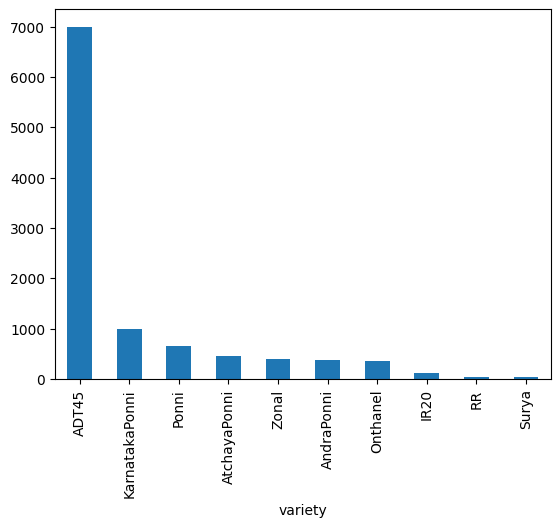

In [7]:
# plot the data based on variety

data['variety'].value_counts().plot(kind='bar')

# Make Function which show 5 normal and 5 dead rice images

In [8]:
normal=data[data['label']=='normal']
normal=normal[normal['variety']=='ADT45']
five_normals=normal.image_id[:5].values
five_normals

array(['100007.jpg', '100025.jpg', '100135.jpg', '100165.jpg',
       '100171.jpg'], dtype=object)

In [9]:
normal=data[data['label']=='dead_heart']
normal=normal[normal['variety']=='ADT45']
five_deads=normal.image_id[:5].values
print(five_deads)

['101165.jpg' '102750.jpg' '108367.jpg' '109900.jpg' '100222.jpg']


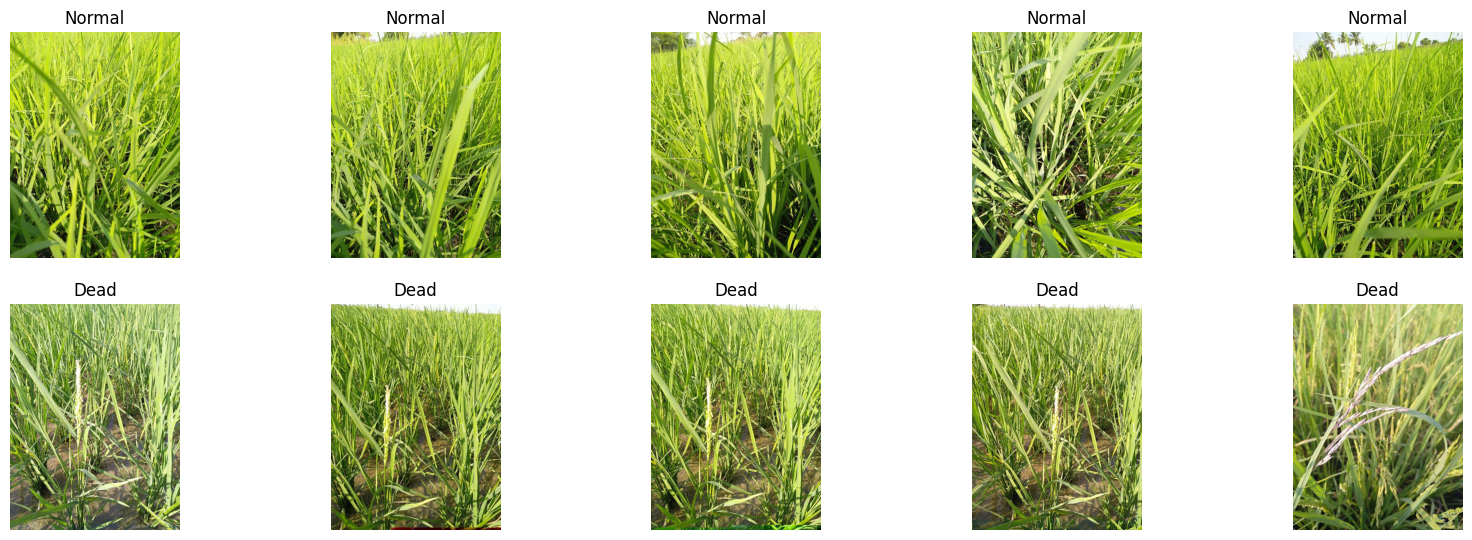

In [10]:
plt.figure(figsize=(20, 10))
columns = 5
path = './data/train_images/'

for i, image_loc in enumerate(np.concatenate((five_normals, five_deads))):
    plt.subplot(10 // columns + 1, columns, i + 1)

    if i < 5:
        image = plt.imread(path + "normal/" + image_loc)
        plt.title("Normal")
    else:
        image = plt.imread(path + "dead_heart/" + image_loc)
        plt.title("Dead")

    plt.imshow(image)
    plt.axis('off')  # Optional: to hide axes

    

# Lets see image of each disease 

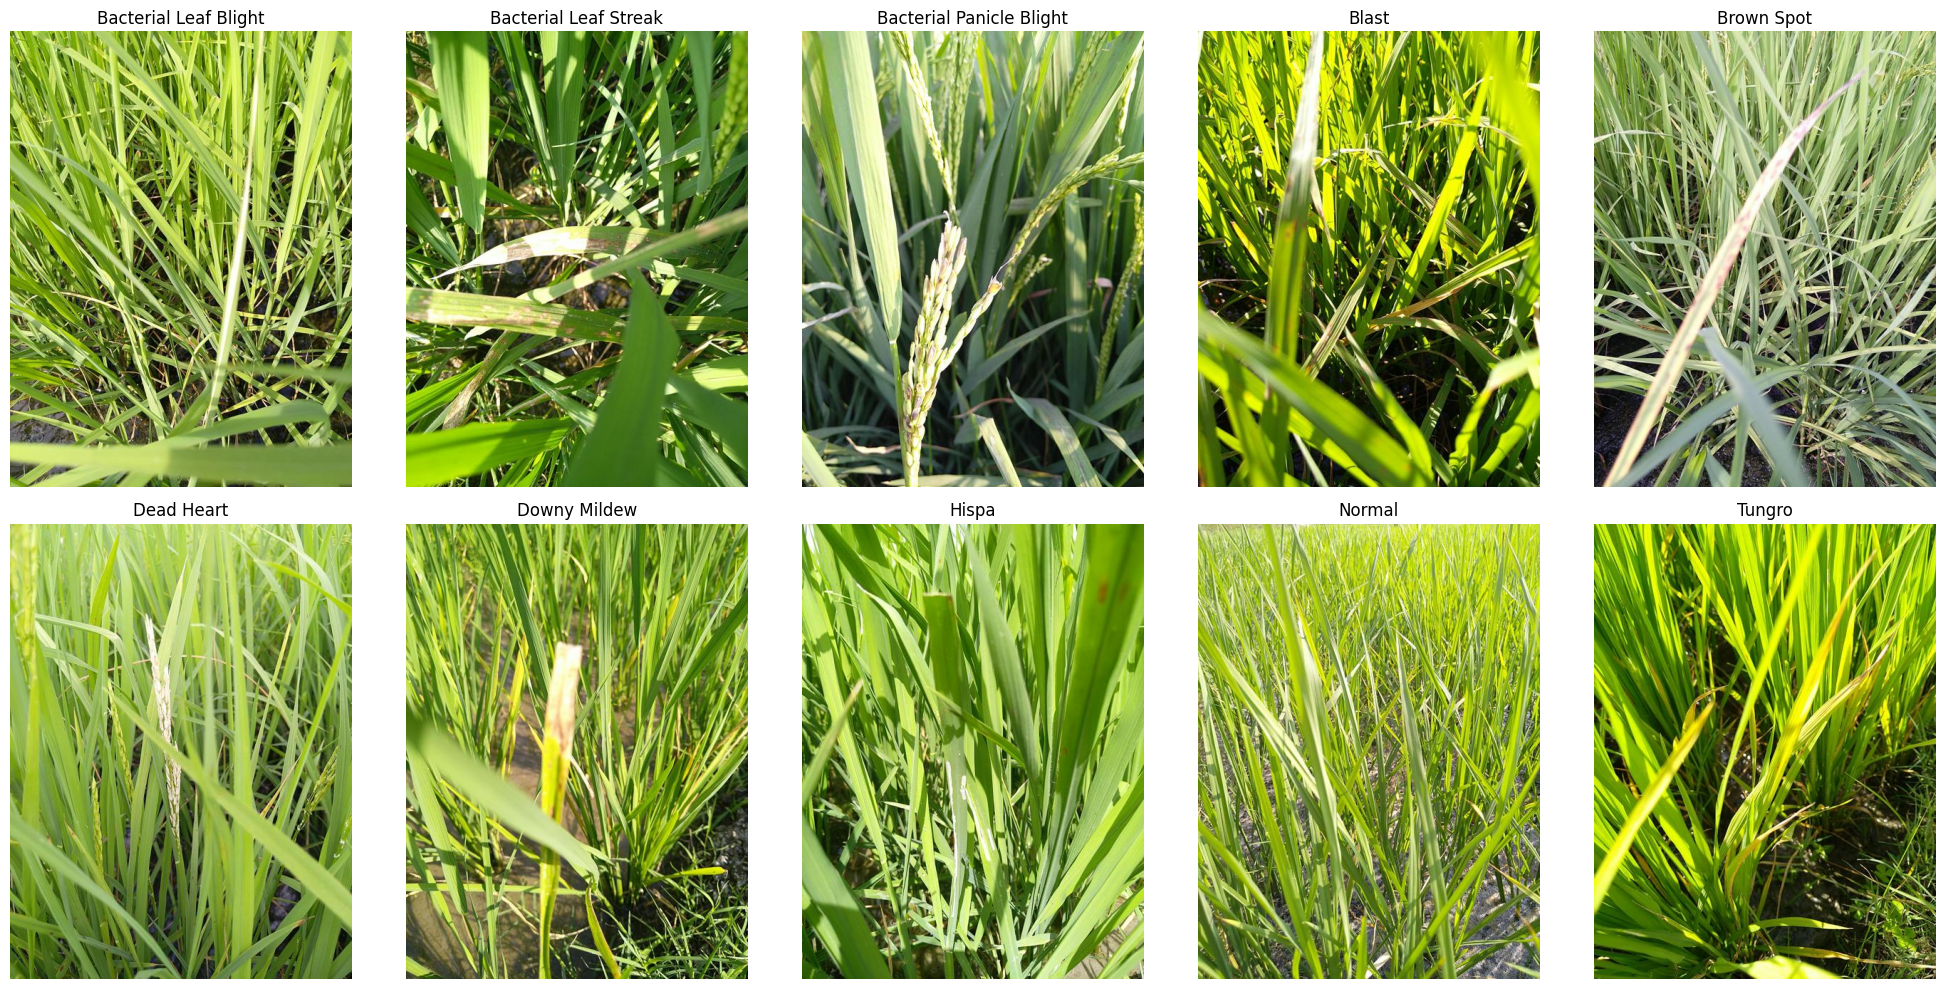

In [11]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

diseases = [
    'bacterial_leaf_blight', 'bacterial_leaf_streak', 'bacterial_panicle_blight',
    'blast', 'brown_spot', 'dead_heart', 'downy_mildew',
    'hispa', 'normal', 'tungro'
]

plt.figure(figsize=(20, 10))

for i, d in enumerate(diseases):
    img_path = os.path.join('./data/train_images', d, os.listdir(f'./data/train_images/{d}')[0])
    img = mpimg.imread(img_path)
    plt.subplot(2, 5, i + 1)
    plt.imshow(img)
    plt.title(d.replace('_', ' ').title())
    plt.axis('off')

plt.tight_layout()
plt.show()


# Encoding Classes 

In [12]:
le=LabelEncoder()
data['variety']=le.fit_transform(data['variety'])
data['label']=le.fit_transform(data['label'])

In [13]:
batch_size=32
img_height=224
img_width=224

In [14]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    path,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size  
)

Found 10407 files belonging to 10 classes.
Using 8326 files for training.


In [15]:
val_ds=tf.keras.utils.image_dataset_from_directory(
    path,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 10407 files belonging to 10 classes.
Using 2081 files for validation.


In [16]:
class_names=train_ds.class_names
class_names

['bacterial_leaf_blight',
 'bacterial_leaf_streak',
 'bacterial_panicle_blight',
 'blast',
 'brown_spot',
 'dead_heart',
 'downy_mildew',
 'hispa',
 'normal',
 'tungro']

# Shape of basice image

In [17]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 224, 224, 3)
(32,)


# Normalizing the images

In [18]:
normalization_layer=tf.keras.layers.Rescaling(1./255)

In [19]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


# MODEL

In [ ]:
num_classes=len(class_names)

model=tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])


# Count how many classes (disease types) we have
num_classes = len(class_names)

# Build the CNN model
model = tf.keras.Sequential([

    tf.keras.layers.Rescaling(1./255),  # Normalize pixel values (0–1)

    tf.keras.layers.Conv2D(32, 3, activation='relu'),  # Conv layer: 32 filters, 3x3, ReLU 
    tf.keras.layers.MaxPooling2D(),                    # Reduce image size

    tf.keras.layers.Conv2D(64, 3, activation='relu'),  # More filters (64), extract more features
    tf.keras.layers.MaxPooling2D(),                    # MAxpooling2D is a technique to reduce spatial dimensions of feature maps

    tf.keras.layers.Conv2D(64, 3, activation='relu'),  # 3rd Conv layer
    tf.keras.layers.MaxPooling2D(),                    # Again reduce size

    tf.keras.layers.Flatten(),                         # Convert 2D features to 1D

    tf.keras.layers.Dropout(0.5),                      # Drop 50% neurons (prevent overfitting)

    tf.keras.layers.Dense(128, activation='relu'),     # Fully connected layer with 128 neurons

    tf.keras.layers.Dense(num_classes, activation='softmax')  # Output layer (1 node per class)
])


# Compiling the model

In [22]:
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

# Easrly stopping

In [ ]:
%%time
#remove warnings
import warnings
warnings.filterwarnings('ignore')

from tensorflow.keras.callbacks import EarlyStopping
# Define the callback function
early_stopping = EarlyStopping(patience=2)  # use 30 

history= model.fit(train_ds,
          validation_data=val_ds,
          epochs=10,  # use 100
          callbacks=[early_stopping])

# evaluat the model
loss = model.evaluate(val_ds)

# Plotting the training and testing loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# plot the accuracy of training and validation

# Plotting the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

### Observation:
1. There are 10407 images
2. we have 10 unique labels disease classes
3. we have 10 unique varieties
4. we have age of rices from 45 days to 82 days with average 65 days
5. The ADT45 is most common variety

-----

## Follow Me:


[![Email](https://img.shields.io/badge/Email-Contact%20Me-red?style=for-the-badge&logo=email)](danishjmeo@gmail.com)
[![Kaggle](https://img.shields.io/badge/Kaggle-Profile-blue?style=for-the-badge&logo=kaggle)](https://www.kaggle.com/danishjmeo)
[![GitHub](https://img.shields.io/badge/GitHub-Profile-blue?style=for-the-badge&logo=github)](https://github.com/danishmeo9) 
[![LinkedIn](https://img.shields.io/badge/LinkedIn-Profile-blue?style=for-the-badge&logo=linkedin)](https://www.linkedin.com/in/danish-javaid-4271a8231/)  